<a href="https://colab.research.google.com/github/zent-iii/projects/blob/main/video_recommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Preaparing the data

##Downloading the dataset

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("abdulwadood11220/youtube-data-for-analytics-600-rows")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/youtube-data-for-analytics-600-rows


##Importing the dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(path + "/youtube_data.csv")
df.head()

,video_id,title,description,published_date,channel_id,channel_title,tags,category_id,view_count,like_count,comment_count,duration,thumbnail
0,gsJAlLOFBv0,TINY Tech That Actually Works,No description available,2025-05-02T17:37:10Z,UCMiJRAwDNSNzuYeN2uWa0pA,Mrwhosetheboss,"['tiny', 'tech', 'gadgets', 'small', 'miniature']",28,8962092.0,243350.0,515.0,PT57S,https://i.ytimg.com/vi/gsJAlLOFBv0/default.jpg
1,ypicIkaiViM,AI & future of workforce: Andrew Yang on how t...,"Andrew Yang, Forward Party co-chair and former...",2025-06-18T12:39:53Z,UCrp_UI8XtuYfpiqluWLD7Lw,CNBC Television,"['Squawk Box U.S.', 'CNBC', 'business news', '...",25,289626.0,3393.0,1240.0,PT7M50S,https://i.ytimg.com/vi/ypicIkaiViM/default.jpg
2,1Nef8LPO-jo,5 ILLEGAL gadgets that will get you ARRESTED,#shorts #technology \n\nI spend a LOT of time ...,2022-11-01T11:00:06Z,UCMiJRAwDNSNzuYeN2uWa0pA,Mrwhosetheboss,"['shorts', 'tech']",28,81372201.0,4178447.0,6378.0,PT47S,https://i.ytimg.com/vi/1Nef8LPO-jo/default.jpg
3,lCHqmzynO-s,Overrated vs. Underrated Tech,💬 Join my Discord server: https://discord.gg/g...,2024-07-08T18:04:31Z,UCPk2s5c4R_d-EUUNvFFODoA,Gohar Khan,"['thailand', 'surin', 'style', 'travel', 'day'...",27,21255964.0,909386.0,2681.0,PT31S,https://i.ytimg.com/vi/lCHqmzynO-s/default.jpg
4,7uFrtqSwYzM,APPLE Glass Revolutionizes AR Experience Forever!,Discover the revolutionary world of augmented ...,2024-12-22T16:49:00Z,UCxqG_E-68WAE0TWYfIopv6Q,Digifix,"['apple glasses price', 'apple glasses design'...",28,2790436.0,44278.0,1359.0,PT16S,https://i.ytimg.com/vi/7uFrtqSwYzM/default.jpg


##Viewing basic stats

In [ ]:
for col in df.columns:
  print(col, df[col].nunique())
  print(col, df[col].isnull().sum())
  print(col, df[col].value_counts().nlargest(1))

video_id 581
video_id 0
video_id video_id
qF8-uaQJuBQ    2
Name: count, dtype: int64
title 573
title 0
title title
Amazing Power Full Tractor Work In The Field #tractor #farming #automobile #technology #shortvideo    4
Name: count, dtype: int64
description 439
description 0
description description
No description available    136
Name: count, dtype: int64
published_date 582
published_date 0
published_date published_date
2024-10-16T14:30:01Z    2
Name: count, dtype: int64
channel_id 409
channel_id 0
channel_id channel_id
UCMiJRAwDNSNzuYeN2uWa0pA    27
Name: count, dtype: int64
channel_title 408
channel_title 0
channel_title channel_title
Mrwhosetheboss    27
Name: count, dtype: int64
tags 328
tags 0
tags tags
['thailand', 'surin', 'style', 'travel', 'day', 'asia', 'elephant', 'bangkok', 'elephantnature', 'asian', 'animal', 'wildlife', 'chiang', 'african', 'asia', 'park', 'safari', 'big', 'travel', 'minneriya', 'thailand grass', 'art', 'green', 'ivory', 'ช้าง', 'ทองใบ', 'พลายทองใบ', 'หนุ่

##Convert the time into **seconds**

In [ ]:
import re

def parse_iso8601_to_seconds(duration):
    m = re.match(r'P(?:(\d+)D)?T(?:(\d+)H)?(?:(\d+)M)?(?:(\d+)S)?', duration)
    if not m:
        return 0
    days = int(m.group(1)) if m.group(1) else 0
    hours = int(m.group(2)) if m.group(2) else 0
    minutes = int(m.group(3)) if m.group(3) else 0
    seconds = int(m.group(4)) if m.group(4) else 0
    return days * 86400 + hours * 3600 + minutes * 60 + seconds

df['duration_in_seconds'] = df['duration'].apply(parse_iso8601_to_seconds)
df.head()

,video_id,title,description,published_date,channel_id,channel_title,tags,category_id,view_count,like_count,comment_count,duration,thumbnail,duration_in_seconds
0,gsJAlLOFBv0,TINY Tech That Actually Works,No description available,2025-05-02T17:37:10Z,UCMiJRAwDNSNzuYeN2uWa0pA,Mrwhosetheboss,"['tiny', 'tech', 'gadgets', 'small', 'miniature']",28,8962092.0,243350.0,515.0,PT57S,https://i.ytimg.com/vi/gsJAlLOFBv0/default.jpg,57
1,ypicIkaiViM,AI & future of workforce: Andrew Yang on how t...,"Andrew Yang, Forward Party co-chair and former...",2025-06-18T12:39:53Z,UCrp_UI8XtuYfpiqluWLD7Lw,CNBC Television,"['Squawk Box U.S.', 'CNBC', 'business news', '...",25,289626.0,3393.0,1240.0,PT7M50S,https://i.ytimg.com/vi/ypicIkaiViM/default.jpg,470
2,1Nef8LPO-jo,5 ILLEGAL gadgets that will get you ARRESTED,#shorts #technology \n\nI spend a LOT of time ...,2022-11-01T11:00:06Z,UCMiJRAwDNSNzuYeN2uWa0pA,Mrwhosetheboss,"['shorts', 'tech']",28,81372201.0,4178447.0,6378.0,PT47S,https://i.ytimg.com/vi/1Nef8LPO-jo/default.jpg,47
3,lCHqmzynO-s,Overrated vs. Underrated Tech,💬 Join my Discord server: https://discord.gg/g...,2024-07-08T18:04:31Z,UCPk2s5c4R_d-EUUNvFFODoA,Gohar Khan,"['thailand', 'surin', 'style', 'travel', 'day'...",27,21255964.0,909386.0,2681.0,PT31S,https://i.ytimg.com/vi/lCHqmzynO-s/default.jpg,31
4,7uFrtqSwYzM,APPLE Glass Revolutionizes AR Experience Forever!,Discover the revolutionary world of augmented ...,2024-12-22T16:49:00Z,UCxqG_E-68WAE0TWYfIopv6Q,Digifix,"['apple glasses price', 'apple glasses design'...",28,2790436.0,44278.0,1359.0,PT16S,https://i.ytimg.com/vi/7uFrtqSwYzM/default.jpg,16


##Analyzing the missing descriptions

In [ ]:
df["missing_description"] = (df['description'] == "No description available")
df["missing_description"].value_counts()

,count
missing_description,
False,464
True,136


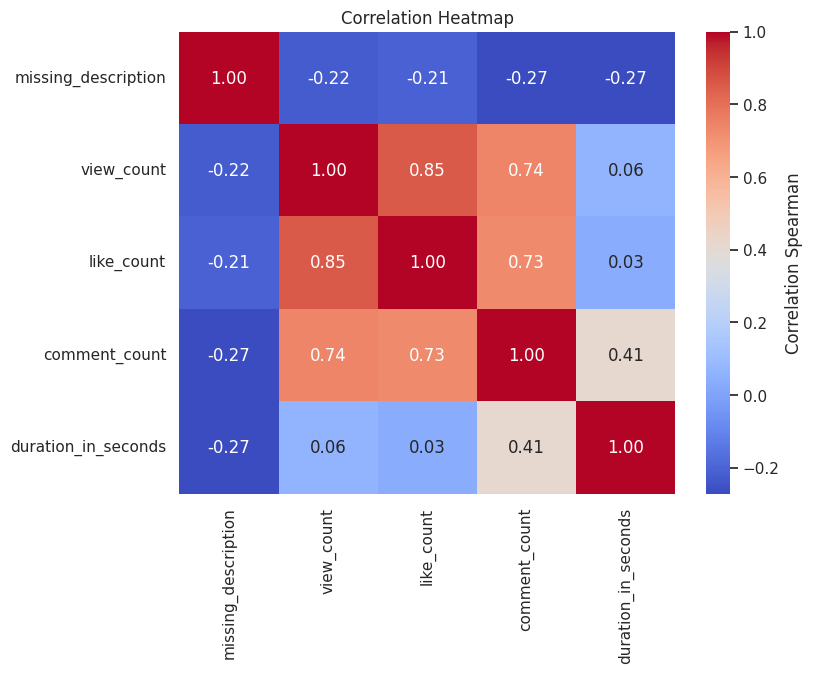

In [ ]:
column_of_interest = ["missing_description", "view_count", "like_count", "comment_count", "duration_in_seconds"]

correlation_matrix = df[column_of_interest].corr(method = 'spearman')

sns.set_theme(style="white")
plt.figure(figsize=(8,6))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={"label": "Correlation Spearman"})
heatmap.set_title("Correlation Heatmap")
plt.show()

##Dropping no description rows

In [ ]:
df = df[df['description'] != "No description available"]
df = df.dropna(subset=["description", "view_count", "like_count", "comment_count", "duration_in_seconds", "title"])
df = df.drop(columns=["missing_description", "duration"])
df = df[df["title"].str.split().str.len() > 2]
df = df[(df['view_count'] > 100) | (df['like_count'] == 0) | (df['comment_count'] == 0)]
df = df[df['like_count'] <= df['view_count']]
df.head()

,video_id,title,description,published_date,channel_id,channel_title,tags,category_id,view_count,like_count,comment_count,thumbnail,duration_in_seconds
1,ypicIkaiViM,AI & future of workforce: Andrew Yang on how t...,"Andrew Yang, Forward Party co-chair and former...",2025-06-18T12:39:53Z,UCrp_UI8XtuYfpiqluWLD7Lw,CNBC Television,"['Squawk Box U.S.', 'CNBC', 'business news', '...",25,289626.0,3393.0,1240.0,https://i.ytimg.com/vi/ypicIkaiViM/default.jpg,470
2,1Nef8LPO-jo,5 ILLEGAL gadgets that will get you ARRESTED,#shorts #technology \n\nI spend a LOT of time ...,2022-11-01T11:00:06Z,UCMiJRAwDNSNzuYeN2uWa0pA,Mrwhosetheboss,"['shorts', 'tech']",28,81372201.0,4178447.0,6378.0,https://i.ytimg.com/vi/1Nef8LPO-jo/default.jpg,47
3,lCHqmzynO-s,Overrated vs. Underrated Tech,💬 Join my Discord server: https://discord.gg/g...,2024-07-08T18:04:31Z,UCPk2s5c4R_d-EUUNvFFODoA,Gohar Khan,"['thailand', 'surin', 'style', 'travel', 'day'...",27,21255964.0,909386.0,2681.0,https://i.ytimg.com/vi/lCHqmzynO-s/default.jpg,31
4,7uFrtqSwYzM,APPLE Glass Revolutionizes AR Experience Forever!,Discover the revolutionary world of augmented ...,2024-12-22T16:49:00Z,UCxqG_E-68WAE0TWYfIopv6Q,Digifix,"['apple glasses price', 'apple glasses design'...",28,2790436.0,44278.0,1359.0,https://i.ytimg.com/vi/7uFrtqSwYzM/default.jpg,16
5,THw-wXt7wyM,5 Tech Myths Busted!,#shorts \n\nI spend a LOT of time trying to ma...,2022-10-02T19:40:14Z,UCMiJRAwDNSNzuYeN2uWa0pA,Mrwhosetheboss,"['shorts', 'tech', 'myths', 'busted', 'tips']",28,28131104.0,1956461.0,6253.0,https://i.ytimg.com/vi/THw-wXt7wyM/default.jpg,56


In [ ]:
def remove_promotional_prefix(text):
    if not isinstance(text, str):
        return text

    promo_patterns = [
        r"^subscribe.*?\n",
        r"^follow me.*?\n",
        r"^check out.*?\n",
        r"^join my discord.*?\n",
        r"^support me.*?\n",
        r"^buy my merch.*?\n",
        r"^visit.*?\n",
        r"^https?://\S+\s*",
    ]

    pattern = re.compile("|".join(promo_patterns), re.IGNORECASE)

    for _ in range(3):
        match = pattern.match(text)
        if match:
            text = text[match.end():].lstrip()
        else:
            break

    return text

df["description"] = df["description"].apply(remove_promotional_prefix)

In [ ]:
df["tagged_description"] = df["video_id"].astype(str) + " " + df["description"]
df.head()

,video_id,title,description,published_date,channel_id,channel_title,tags,category_id,view_count,like_count,comment_count,thumbnail,duration_in_seconds,tagged_description
1,ypicIkaiViM,AI & future of workforce: Andrew Yang on how t...,"Andrew Yang, Forward Party co-chair and former...",2025-06-18T12:39:53Z,UCrp_UI8XtuYfpiqluWLD7Lw,CNBC Television,"['Squawk Box U.S.', 'CNBC', 'business news', '...",25,289626.0,3393.0,1240.0,https://i.ytimg.com/vi/ypicIkaiViM/default.jpg,470,"ypicIkaiViM Andrew Yang, Forward Party co-chai..."
2,1Nef8LPO-jo,5 ILLEGAL gadgets that will get you ARRESTED,#shorts #technology \n\nI spend a LOT of time ...,2022-11-01T11:00:06Z,UCMiJRAwDNSNzuYeN2uWa0pA,Mrwhosetheboss,"['shorts', 'tech']",28,81372201.0,4178447.0,6378.0,https://i.ytimg.com/vi/1Nef8LPO-jo/default.jpg,47,1Nef8LPO-jo #shorts #technology \n\nI spend a ...
3,lCHqmzynO-s,Overrated vs. Underrated Tech,💬 Join my Discord server: https://discord.gg/g...,2024-07-08T18:04:31Z,UCPk2s5c4R_d-EUUNvFFODoA,Gohar Khan,"['thailand', 'surin', 'style', 'travel', 'day'...",27,21255964.0,909386.0,2681.0,https://i.ytimg.com/vi/lCHqmzynO-s/default.jpg,31,lCHqmzynO-s 💬 Join my Discord server: https://...
4,7uFrtqSwYzM,APPLE Glass Revolutionizes AR Experience Forever!,Discover the revolutionary world of augmented ...,2024-12-22T16:49:00Z,UCxqG_E-68WAE0TWYfIopv6Q,Digifix,"['apple glasses price', 'apple glasses design'...",28,2790436.0,44278.0,1359.0,https://i.ytimg.com/vi/7uFrtqSwYzM/default.jpg,16,7uFrtqSwYzM Discover the revolutionary world o...
5,THw-wXt7wyM,5 Tech Myths Busted!,#shorts \n\nI spend a LOT of time trying to ma...,2022-10-02T19:40:14Z,UCMiJRAwDNSNzuYeN2uWa0pA,Mrwhosetheboss,"['shorts', 'tech', 'myths', 'busted', 'tips']",28,28131104.0,1956461.0,6253.0,https://i.ytimg.com/vi/THw-wXt7wyM/default.jpg,56,THw-wXt7wyM #shorts \n\nI spend a LOT of time ...


#Processing the texts

In [ ]:
!pip install -U sentence-transformers

In [ ]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

In [ ]:
descriptions = df['description'].tolist()
description_embeddings = model.encode(descriptions, show_progress_bar=True)

df['description_embeddings'] = list(description_embeddings)

def recommend_video_enhanced(description, df, model, top_n=5, description_weight=0.75, ratio_weight=0.25):
    input_embedding = model.encode([description])[0]
    description_similarities = np.dot(df['description_embeddings'].tolist(), input_embedding)

    df['like_view_ratio'] = df.apply(lambda row: row['like_count'] / row['view_count'] if row['view_count'] > 0 else 0, axis=1)

    min_desc_sim = description_similarities.min()
    max_desc_sim = description_similarities.max()
    normalized_description_similarities = (description_similarities - min_desc_sim) / (max_desc_sim - min_desc_sim) if (max_desc_sim - min_desc_sim) != 0 else np.zeros_like(description_similarities)

    min_ratio = df['like_view_ratio'].min()
    max_ratio = df['like_view_ratio'].max()
    normalized_like_view_ratio = (df['like_view_ratio'] - min_ratio) / (max_ratio - min_ratio) if (max_ratio - min_ratio) != 0 else np.zeros_like(df['like_view_ratio'])

    combined_scores = (description_weight * normalized_description_similarities) + (ratio_weight * normalized_like_view_ratio)

    most_similar_indices = np.argsort(combined_scores)[-top_n:][::-1]

    recommended_videos = df.iloc[most_similar_indices]
    return recommended_videos[['title', 'video_id', 'description', 'view_count', 'like_count', 'comment_count', 'like_view_ratio']]

#Example
example_description = "Learn about machine learning algorithms and data science concepts."
recommended = recommend_video_enhanced(example_description, df, model)

print(f"Recommended videos for the description: '{example_description}' (Enhanced)")
print(recommended)

first_video_description = df['description'].iloc[0]
recommended_from_video = recommend_video_enhanced(first_video_description, df, model)

print(f"\nRecommended videos based on the description of the first video (Enhanced):")
recommended_from_video


Batches:   0%|          | 0/14 [00:00<?, ?it/s]

Recommended videos for the description: 'Learn about machine learning algorithms and data science concepts.' (Enhanced)
                                                 title     video_id  \
443  How Pakistan Stole Nuclear B*mb Technology? | ...  Zrss8I4mvu4   
183  IT vs. Computer Science Degrees: Which One Is ...  VmqH41dydeI   
439  The Evolution of Technology: A Journey with Ji...  kqXfvqIzpgs   
172  Japan next level technology 🤯 #japan #technolo...  PFcqKDOjMzM   
450  Top 10 Technologies To Learn In 2025 | Top Tre...  2rN0XTW8dU8   

                                           description  view_count  \
443  Boost your career in Data Science, Software De...   1595996.0   
183  🔎 IT vs. Computer Science: Which Degree Is Rig...    158437.0   
439  Jim Al-Khalili explores the history of compute...    186040.0   
172  Japan ki future technology is outstanding.\n\n...    245854.0   
450  In this video on the Top 10 Technologies to Le...    740105.0   

        like_count  comment_coun

,title,video_id,description,view_count,like_count,comment_count,like_view_ratio
1,AI & future of workforce: Andrew Yang on how t...,ypicIkaiViM,"Andrew Yang, Forward Party co-chair and former...",289626.0,3393.000000,1240.0,0.011715
172,Japan next level technology 🤯 #japan #technolo...,PFcqKDOjMzM,Japan ki future technology is outstanding.\n\n...,245854.0,217464.608379,15.0,0.884527
254,Future Technology | 60 Minutes Marathon,wrJsExM8D-o,"From December 2023, Scott Pelley’s report on q...",4944688.0,38775.000000,2280.0,0.007842
376,Elon Musk and President Trump Feud Impacts Tes...,twFO7qaGMxU,Bloomberg’s Caroline Hyde and Ed Ludlow discus...,9923.0,166.000000,24.0,0.016729
417,Japan Ki Technology |#shortvideo #japan,1UloeYdlFII,Japan Ki Technology |#shortvideo #japan,324714.0,217464.608379,25.0,0.669711
